In [ ]:
# Importing Packages
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm
from scipy.integrate import odeint

In [ ]:
# Original Message
def message(t):
  org=[]
  for i in t:
    org.append((0.1*np.sin(1.2*np.pi*np.sin(i+0.001)*np.sin(i+0.001)) *
                np.cos(10*np.pi*np.cos(0.9*(i+0.001))))/(np.pi*np.sin(i+0.001)*np.sin(i+0.001)))

  amplitude_noise = 0.2
  noise = 1 + amplitude_noise * np.random.normal(0, 1, len(org))
  m =  org * noise
  return m

In [ ]:
#Compute the time-derivative of a Lorenz systems
def xyz1(a,b,c,k,tmp):
  x=sigma*(b - a)
  y=rho*a - b - a*c
  z=-1*(beta*c) + a*b
  return (x,y,z)

def xyz2(a,b,c,k,tmp):
  x=sigma*(b - a)
  y=(s[k]+tmp)*(rho - c) - b
  z=-1*(beta*c) + (s[k]+tmp)*b
  return (x,y,z)


In [ ]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(fun,a1,b1,c1,n,dt):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    t[0] = 0

    #Compute the approximate solution at equally spaced times.
    for k in range (n-1):

        t[k+1] = t[k] + dt
        k1,l1,m1 = fun(x1[k], y1[k], z1[k],k,0)
        k2,l2,m2 = fun((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt),
         (z1[k] + 0.5*m1*dt),k,0.5*k1*dt)
        k3,l3,m3 = fun((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt),
         (z1[k] + 0.5*m2*dt),k,0.5*k2*dt)
        k4,l4,m4 = fun((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),k,k3*dt)


        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)


    return x1,y1,z1,t


In [ ]:
#Func for Secure Communication
def sec_com(x1,m):
  s=[]
  for i,l in zip(x1,m):
    s.append(i+l)
  return s

In [ ]:
# Initial conditions and function call
sigma = 10 #16
beta = 8/3 #4
rho = 28 #45.2
N=10000
dt=0.01
x_1, y_1, z_1,t =RungeKutta4(xyz1,1,0,0,N,dt)
df = pd.DataFrame(x_1)
df.to_csv('y1.csv', index=False) #For parameter estimation code so in y1, y means slave sytem and 1 is x-component here
m=message(t)
s=sec_com(x_1,m)
x_2,y_2, z_2,t = RungeKutta4(xyz2,0.12,-0.01,0.02,N,dt)



<Figure size 850x850 with 0 Axes>

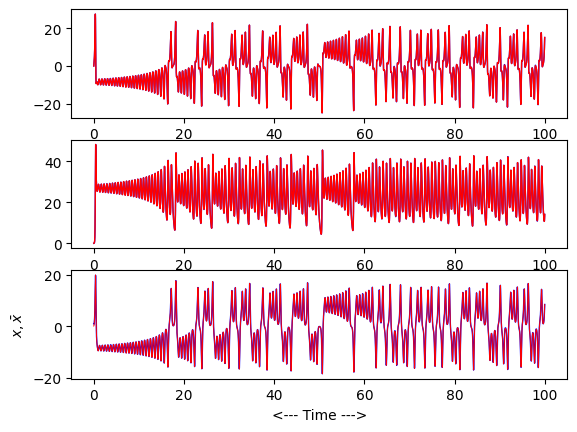

In [ ]:
#Plots
plt.figure (figsize = (8.5,8.5))
fig, axs = plt.subplots(3,1)

axs[0].plot ( t, y_1, linewidth = 1, color = 'b' )
axs[0].plot ( t, y_2, linewidth = 1, color = 'r' )
plt.ylabel ( r'$y,\bar{y}$')

axs[1].plot ( t, z_1, linewidth = 1, color = 'b' )
axs[1].plot ( t, z_2, linewidth = 1, color = 'r' )
plt.xlabel ( '<--- Time --->' )
plt.ylabel ( r'$z,\bar{z}$')

axs[2].plot ( t, x_1, linewidth = 1, color = 'b' )
axs[2].plot ( t, x_2, linewidth = 0.7, color = 'r' )
plt.xlabel ( '<--- Time --->' )
plt.ylabel ( r'$x,\bar{x}$')
plt.show ( )

In [ ]:
# Restoring Message
m_=[]
for i,j in zip(s,x_2):
    m_.append(i-j)

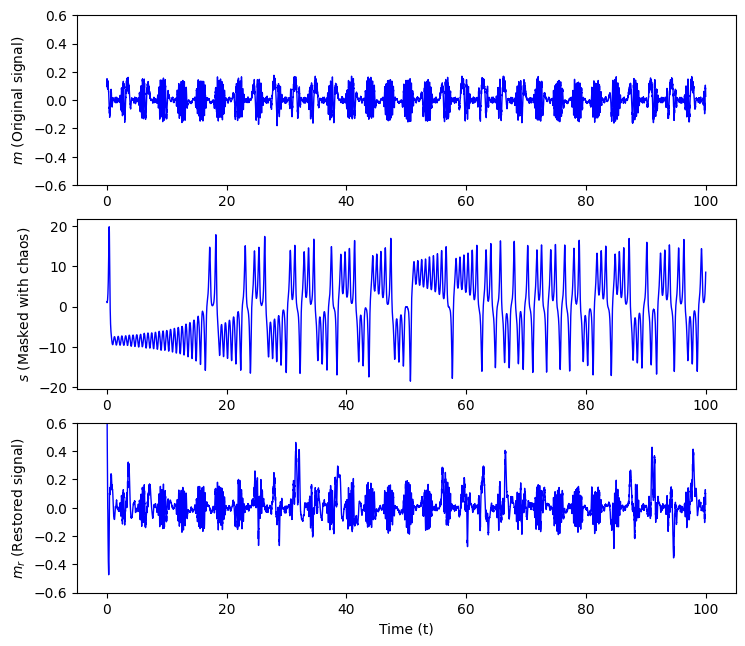

In [ ]:
#Secure communication Plot
plt.figure (figsize = (8.5,7.5))
plt.subplot(3,1,1)
plt.plot ( t, m, linewidth = 1, color = 'b' )
plt.ylim(-0.6,0.6)
plt.ylabel ( r'$m$ (Original signal)')

plt.subplot(3,1,2)
plt.plot ( t, s, linewidth = 1, color = 'b' )
plt.ylabel ( r'$s$ (Masked with chaos)')

plt.subplot(3,1,3)
plt.plot ( t, m_, linewidth = 1, color = 'b' )
plt.ylim(-0.6,0.6)
plt.xlabel ( 'Time (t)' )
plt.ylabel ( r'$m_{r}$ (Restored signal)')
plt.savefig('SC_CS-1.pdf', format='pdf')
plt.show ( )